In [1]:
import numpy
from numpy import genfromtxt
dubinsData = genfromtxt("D:\\Julia\\data\\dubinsData.csv", delimiter=',')

In [2]:
import math

In [3]:
data = dubinsData
data[:,-1] = data[:,-1].round()
data[2088]

array([ 0.5       , -0.5       ,  1.74753355,  0.62704688, -0.26381886,
       -1.        ])

In [4]:
#data = numpy.array([[2,3,1,1,numpy.pi/2]]) # TEST

data[:,0] = data[:,0] - data[:,2]
data[:,1] = data[:,1] - data[:,3]

data[:,2] = 0
data[:,3] = 0

tempX = numpy.multiply(data[:,0], numpy.cos(data[:,4])) + numpy.multiply(data[:,1], numpy.sin(data[:,4]))
tempY = -numpy.multiply(data[:,0], numpy.sin(data[:,4])) + numpy.multiply(data[:,1], numpy.cos(data[:,4]))

data[:,0] = tempX
data[:,1] = tempY

data[:,4] = 0
print(data.shape)

ys = data[:,1].reshape(1,len(data))[0]

temp = numpy.arange(len(ys))
a = (ys<-0.055)|(ys>0.055)
b = temp%20000==0
data = data[a | b, :]

us = data[:,5].reshape(1,len(data))[0]
c = us!=0
data = data[c,:]

data = data[:,[0,1,5]]
data = numpy.unique(data, axis = 0)
print(data.shape)

(17586, 6)
(9039, 3)


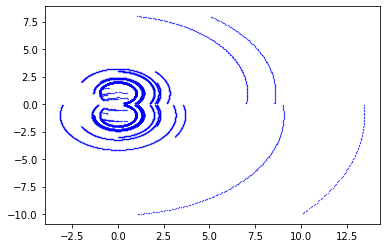

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1], c ="blue", s = 0.1)

In [6]:
#us = dubinsData[:,5].reshape(1,1000)[0]
#a = us == 1
#b = us == -1
#c = us == 0
## filtering out noise
#data = dubinsData[ a | b | c ,:]
#data

In [7]:
#data

In [8]:
X = data[:,0:2]
y = data[:,2]

In [9]:
print(X.shape, y.shape)

(9039, 2) (9039,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [11]:
print(len(y_train),len(y_test))

7231 1808


In [12]:
# MODEL USING CURRENTLY IS - DT CLASSIFIER

In [341]:
# MLP CLASSIFIER
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(4,4), max_iter=2000,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
print((cm))

[[2808   61   43]
 [ 368 3686    8]
 [ 175  187 3600]]


In [13]:
# CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)
# performing predictions on the test dataset
y_pred = classifier.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  1.0


In [419]:
# REGRESSOR, WRITING CLASSIFIER FOR CONVENIENCE
from sklearn.ensemble import RandomForestRegressor

 # create regressor object
classifier = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn import metrics  
  
# using metrics module for accuracy calculation
print("ERROR OF THE MODEL: ", metrics.mean_squared_error(y_test, y_pred))

ERROR OF THE MODEL:  0.02855615398683248


In [14]:
def normalizer(data):
    data[:,0] = data[:,0] - data[:,2]
    data[:,1] = data[:,1] - data[:,3]
    
    data[:,2] = 0
    data[:,3] = 0
    
    tempX = numpy.multiply(data[:,0], numpy.cos(data[:,4])) + numpy.multiply(data[:,1], numpy.sin(data[:,4]))
    tempY = -numpy.multiply(data[:,0], numpy.sin(data[:,4])) + numpy.multiply(data[:,1], numpy.cos(data[:,4]))
    
    data[:,0] = tempX
    data[:,1] = tempY
    
    data[:,4] = 0
    
    data = data[:,[0,1]]
    
    return data

In [49]:
# defining initial conditions
xi = 0
yi = 0
xf = 9
yf = 1
ai = 0
v = 1

In [50]:
x = [xi]
y = [yi]
a = [ai]
dt = 0.01
us = []
while math.sqrt((xf - x[-1])**2 + (yf - y[-1])**2) > 0.1:
    sample = numpy.array([xf,yf,x[-1],y[-1],a[-1]]).reshape(1, -1)
    sample = normalizer(sample)
    
    u = classifier.predict(sample)
    us.append(u)
    a.append(a[-1] + dt*v*u[0])
    x.append(x[-1] + dt*v*math.cos(a[-2]))
    y.append(y[-1] + dt*v*math.sin(a[-2]))

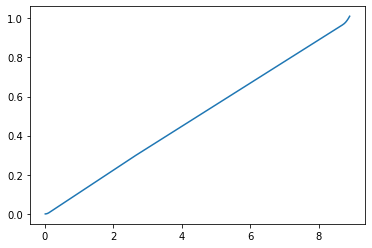

In [51]:
plt.plot(x[1:1950], y[1:1950])

In [52]:
us

[array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 arra

In [345]:
data = numpy.array([[2,3,1,1,numpy.pi/2]]) # TEST
normalizer(data)

array([[ 2., -1.,  0.,  0.,  0.]])

In [315]:
a = numpy.array([[1,2],[3,4]])
b = numpy.array([[[0,2],[3,4]],[[5,6],[7,8]]])
a[:,:] = 0
print(a)
print(numpy.cos(b))

[[0 0]
 [0 0]]
[[[ 1.         -0.41614684]
  [-0.9899925  -0.65364362]]

 [[ 0.28366219  0.96017029]
  [ 0.75390225 -0.14550003]]]


In [303]:
print(numpy.dot(a,b))

[[[ 7 10]
  [19 22]]

 [[15 22]
  [43 50]]]


In [330]:
#clf.predict
(numpy.array([1,1,0,0,0]).reshape(1, -1))

array([[1, 1, 0, 0, 0]])

In [351]:
numpy.stack((x,y),axis = 1)

array([[0.00000000e+00, 0.00000000e+00],
       [1.00000000e-02, 0.00000000e+00],
       [1.99995000e-02, 9.99983333e-05],
       ...,
       [1.00589130e+00, 4.88364195e+00],
       [1.00519982e+00, 4.89361801e+00],
       [1.00440861e+00, 4.90358666e+00]])

[[1, 2], 0]
